file:///home/hamidi/Downloads/2020-06-21-kr_extended-SHL2020%20(1).png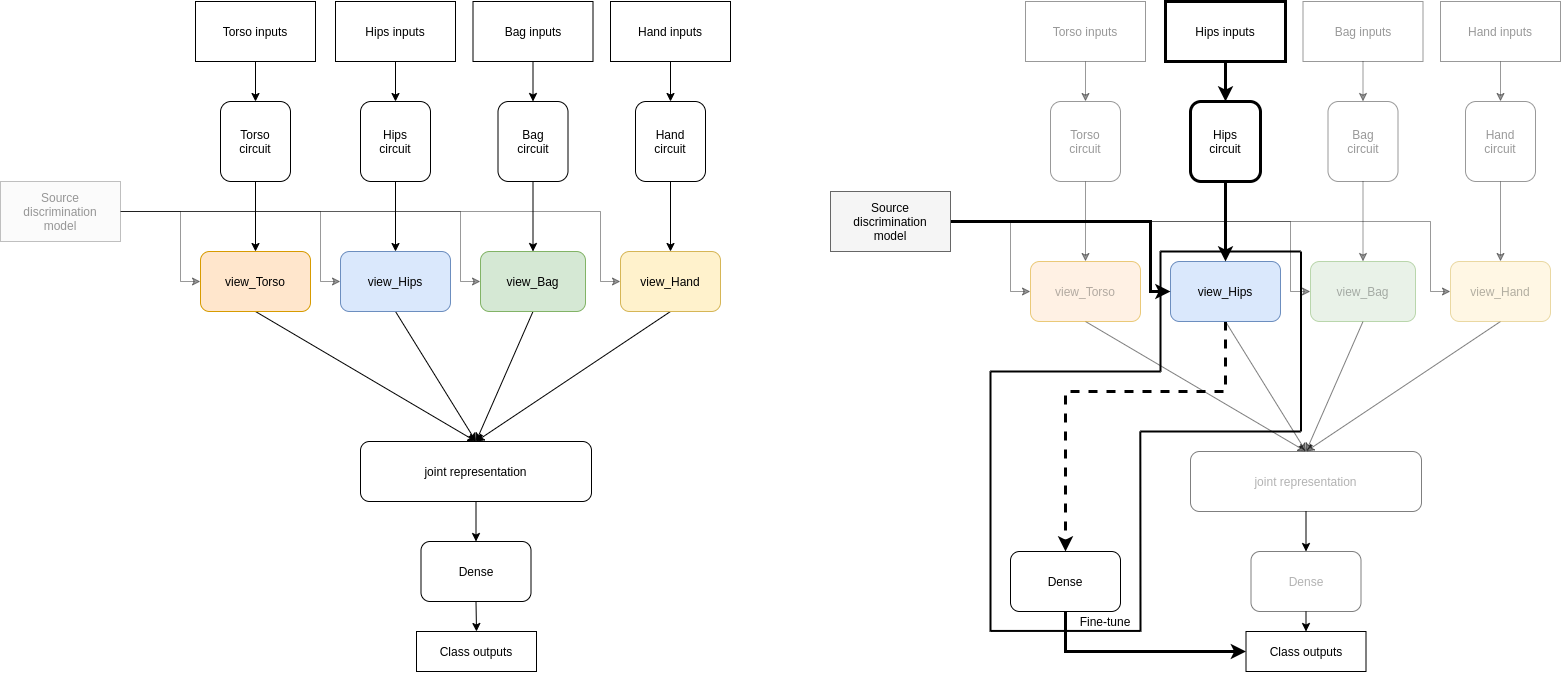

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from dataset import DataReader
from refinedsample import RefinedSample

train = DataReader(what='train')
validation = DataReader(what='validation')

generated/0.5/train/train_Torso_Pressure.mmap exists, loading ...
generated/0.5/train/train_Torso_Acc_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Gyr_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Mag_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Ori_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Gra_m.mmap exists, loading ...
generated/0.5/train/train_Torso_LAcc_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Pressure.mmap exists, loading ...
generated/0.5/train/train_Hips_Acc_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Gyr_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Mag_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Ori_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Gra_m.mmap exists, loading ...
generated/0.5/train/train_Hips_LAcc_m.mmap exists, loading ...
generated/0.5/train/train_Bag_Pressure.mmap exists, loading ...
generated/0.5/train/train_Bag_Acc_m.mmap exists, load

In [3]:
import stjohns as ag

#################################################
updated @12:58 (june 18) version of stjohns_7.py:
+ updated hyperparameters with best so-far -- arch#184 (SaFpz) gave 66.54% on validation (tehran_1)
+ used only Pressure, *_m modalities
#################################################
updated @16:38 (june 18) version of stjohns_8.py:
+ models' weights are saved every epoch
+ dropout after each layer (even after Conv1d)
+ switched back to 25 epochs
#################################################
updated @18:15 (june 18) version of stjohns_9.py:
+ switched back to dropout only after dense layers (not after Conv1d)
#################################################
updated @20:44 (june 18) version of stjohns_10.py:
+ reduce dropout for dense layers (view_Position) from ~0.8 to ~0.5 but keep the last dropout is kept @0.8
+ as val_acc is above tr_acc, increase number of epochs from 25 to 50
#################################################
updated @15:55 (june 19) version of stjohns_11.py

# Fine-tuning trainVsSubway model

In [4]:
checkpoint_path = 'stjohns_43'
epoch = 48

#map original labels to the new learning problem
new_classes = {
    0: ['train'],
    1: ['subway']
}
num_classes = len(list(new_classes.keys()))
refinedSampleId = 'trainVsSubway'

# load data
train_dict, train_labels = ag.load_data(what='train', new_classes=new_classes, refinedSampleId=refinedSampleId)
valid_dict, valid_labels = ag.load_data(what='validation', new_classes=new_classes, refinedSampleId=refinedSampleId)

generated/0.5/train/train_Torso_Pressure.mmap exists, loading ...
generated/0.5/train/train_Torso_Acc_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Gyr_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Mag_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Ori_m.mmap exists, loading ...
generated/0.5/train/train_Torso_Gra_m.mmap exists, loading ...
generated/0.5/train/train_Torso_LAcc_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Pressure.mmap exists, loading ...
generated/0.5/train/train_Hips_Acc_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Gyr_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Mag_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Ori_m.mmap exists, loading ...
generated/0.5/train/train_Hips_Gra_m.mmap exists, loading ...
generated/0.5/train/train_Hips_LAcc_m.mmap exists, loading ...
generated/0.5/train/train_Bag_Pressure.mmap exists, loading ...
generated/0.5/train/train_Bag_Acc_m.mmap exists, load

In [5]:
train_dict['Hips_Pressure'][34]

array([0.04471841, 0.04471852, 0.04471839, 0.04471847, 0.04471838,
       0.04471823, 0.04471828, 0.04471838, 0.0447183 , 0.04471794,
       0.0447178 , 0.04471754, 0.04471755, 0.04471759, 0.04471737,
       0.04471738, 0.04471738, 0.04471739, 0.04471742, 0.04471741,
       0.04471727, 0.04471737, 0.04471787, 0.04471809, 0.0447184 ,
       0.04471846, 0.04471833, 0.04471829, 0.04471842, 0.04471893,
       0.04471941, 0.04471969, 0.04471977, 0.04471977, 0.04471983,
       0.04471992, 0.04472004, 0.04472015, 0.04472035, 0.04472048,
       0.04472081, 0.04472101, 0.04472083, 0.04472074, 0.04472058,
       0.04472057, 0.04472059, 0.0447205 , 0.04472033, 0.04472035,
       0.0447203 , 0.04472044, 0.04472066, 0.04472072, 0.04472083,
       0.04472067, 0.04472033, 0.04472022, 0.04472009, 0.04471997,
       0.04471973, 0.04471949, 0.04471959, 0.04471988, 0.04471992,
       0.04471993, 0.04471985, 0.04471975, 0.04471987, 0.04472003,
       0.04472022, 0.04472044, 0.04472061, 0.0447208 , 0.04472

## Base model

In [6]:
#Base model
model = ag.stjohns(ag.dict_of_params(ag.params), num_classes=num_classes)
model.load_weights(checkpoint_path+'/cp.{epoch:04d}.ckpt'.format(epoch=epoch))

circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m
circuit of channel Pressure
circuit of channel Acc_m
circuit of channel Gyr_m
circuit of channel Mag_m
circuit of channel Ori_m
circuit of channel Gra_m
circuit of channel LAcc_m


## Select desired position-dependent circuit within the base model

In [7]:
position = 'Hips'

In [8]:
inputs = [input for input in model.inputs if input.name.startswith(position)]
view = model.get_layer('view_'+position).output
base_model = tf.keras.Model(inputs=inputs, outputs=view)
#base_model.load_weights(sg.checkpoint_path.format(epoch=1))

#Freeze model for now
base_model.trainable = False  #freeze base_model's weights
assert base_model.get_layer('view_'+position).trainable == False   # check if freezed (eg. dense layer view_Torso)

## Top additional layers

In [11]:
#Top additional layers
view = base_model(inputs=inputs, training=False)  # <--- not to confuse with trainable. Here it means that the base model is used solely in inference mode

view = tf.keras.layers.Dense(40, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.001),
                bias_regularizer=tf.keras.regularizers.l2(0.001),
                activity_regularizer=tf.keras.regularizers.l2(0.001))(view)
view = tf.keras.layers.Dense(30, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.001),
                bias_regularizer=tf.keras.regularizers.l2(0.001),
                activity_regularizer=tf.keras.regularizers.l2(0.001))(view)
class_outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(view)

model = tf.keras.Model(inputs=inputs, outputs=class_outputs)
model.summary()
#tf.keras.utils.plot_model(model, 'washington_fine_tune.png', show_shapes=True)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Hips_Pressure (InputLayer)      [(None, 500)]        0                                            
__________________________________________________________________________________________________
Hips_Acc_m (InputLayer)         [(None, 500)]        0                                            
__________________________________________________________________________________________________
Hips_Gyr_m (InputLayer)         [(None, 500)]        0                                            
__________________________________________________________________________________________________
Hips_Mag_m (InputLayer)         [(None, 500)]        0                                            
____________________________________________________________________________________________

In [12]:
#train the top layers

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # , amsgrad=True),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(
    train_dict,
    tf.keras.utils.to_categorical(train_labels, num_classes=num_classes),
    batch_size=512,
    epochs=10,
    # callbacks=[ReportIntermediates(), cp_callback],
    # validation_split=0.3,
    validation_data=(valid_dict, tf.keras.utils.to_categorical(valid_labels, num_classes=num_classes)),
    shuffle=True
)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[512,242,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_3/model_1/Hips/LAcc_m/Conv1d/layer_0/ActivityRegularizer/Square (defined at <ipython-input-12-7ca8b017f8ae>:8) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_10956]

Function call stack:
train_function


## Fine-tune

In [ ]:
# Fine-tune
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # , amsgrad=True),  # <--- lower learning rate (according to documentation)
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(
    train_dict,
    tf.keras.utils.to_categorical(train_labels, num_classes=8),
    batch_size=512,
    epochs=10,
    # callbacks=[ReportIntermediates(), cp_callback],
    # validation_split=0.3,
    validation_data=(valid_dict, tf.keras.utils.to_categorical(valid_labels, num_classes=num_classes)),
    shuffle=True
)

## Check predictions